In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

In [2]:
session = fastf1.get_session(2024, 6, 'R')
session.load(telemetry=False, weather=False)
laps = session.laps.pick_quicklaps()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /home/dang032003/.cache/fastf1.
	Size: 496.84 MB
core           INFO 	Loading data for Miami Grand Prix - Race [v3.0.0]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '16', '11', '55', '44', '22', '63', '14', '31', '27', '10', '81', '24', '3', '77', '18', '23', '20', '2']


In [3]:
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
#team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}

Index(['Ferrari', 'Red Bull Racing', 'McLaren', 'Mercedes', 'Haas F1 Team',
       'Alpine', 'RB', 'Aston Martin', 'Kick Sauber', 'Williams'],
      dtype='object', name='Team')


In [4]:
# make a color palette associating team names to hex codes
team_palette = {}
for team in team_order:
    try:
        team_palette[team] = fastf1.plotting.team_color(team)
    except KeyError:
        team_palette[team] = '#000000'  # Default color (black) if team color not found

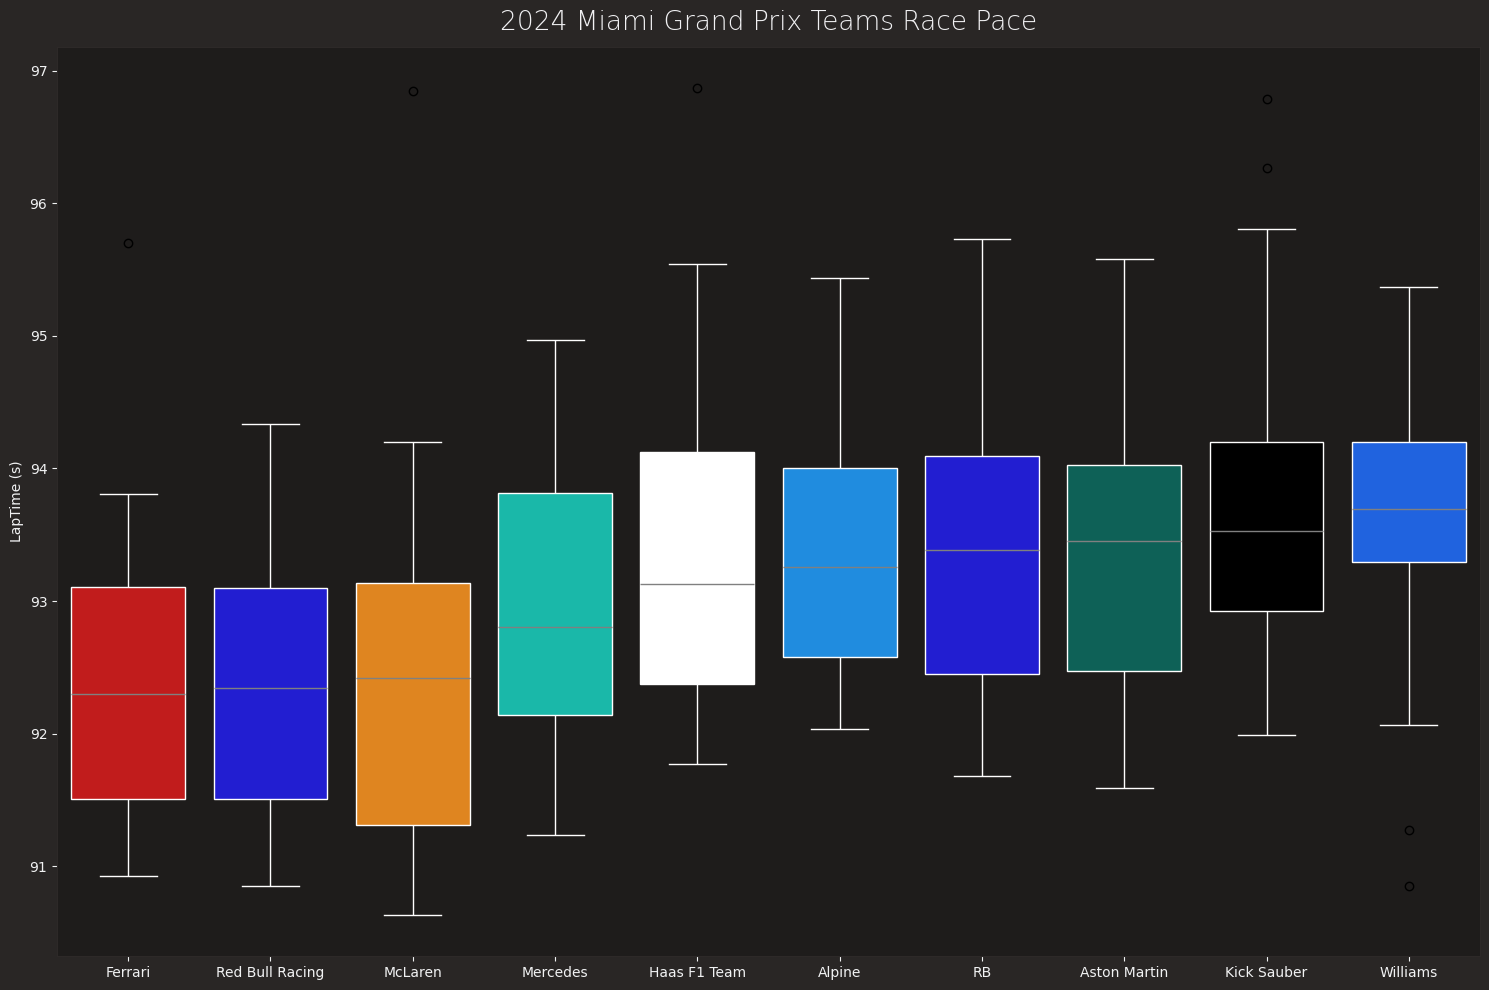

In [5]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2024 Miami Grand Prix Teams Race Pace")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

In [6]:
drivers = session.drivers[:20]
print(drivers)
driver_laps = session.laps.pick_drivers(drivers).pick_quicklaps()
driver_laps = driver_laps.reset_index()

['4', '1', '16', '11', '55', '44', '22', '63', '14', '31', '27', '10', '81', '24', '3', '77', '18', '23', '20', '2']


In [7]:
finishing_order = [session.get_driver(i)["Abbreviation"] for i in drivers]
print(finishing_order)

['NOR', 'VER', 'LEC', 'PER', 'SAI', 'HAM', 'TSU', 'RUS', 'ALO', 'OCO', 'HUL', 'GAS', 'PIA', 'ZHO', 'RIC', 'BOT', 'STR', 'ALB', 'MAG', 'SAR']


In [8]:
driver_colors = {
    'LEC': '#E8002D',
    'SAI': '#E8002D',
    'VER': '#3671C6',
    'PER': '#3671C6',
    'PIA': '#FF8000',
    'NOR': '#FF8000',
    'GAS': '#FF87BC',
    'OCO': '#FF87BC',
    'BOT': '#52E252',
    'ZHO': '#52E252',
    'TSU': '#6692FF',
    'RIC': '#6692FF',
    'MAG': '#B6BABD',
    'HUL': '#B6BABD',
    'ALO': '#229971',
    'STR': '#229971',
    'HAM': '#27F4D2',
    'RUS': '#27F4D2',
    'ALB': '#64C4FF',
    'SAR': '#64C4FF'
}

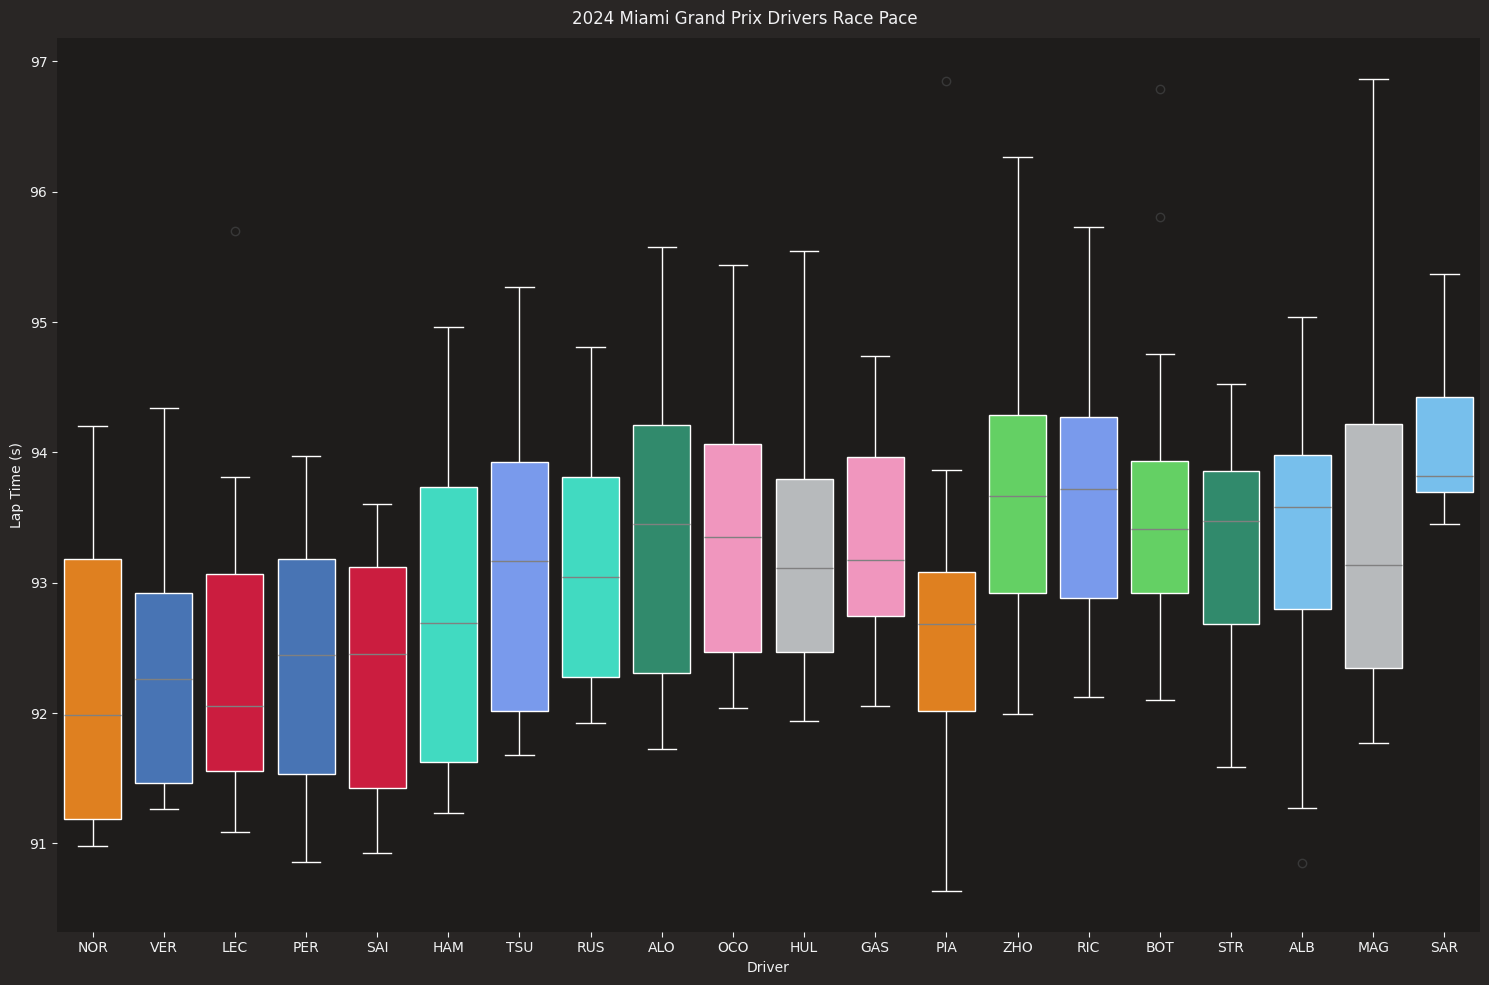

In [9]:
fig, ax = plt.subplots(figsize=(15, 10))
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.boxplot(
    data=driver_laps,
    x="Driver",
    y="LapTime(s)",
    hue="Driver",
    order=finishing_order,
    palette=driver_colors,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)
"""
sns.swarmplot(
    data=driver_laps,
    x="Driver",
    y="LapTime(s)",
    order=finishing_order,
    hue="Compound",
    palette=fastf1.plotting.COMPOUND_COLORS,
    hue_order=["SOFT", "MEDIUM", "HARD"],
    linewidth=0,
    size=4,
)
"""
ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("2024 Miami Grand Prix Drivers Race Pace")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()